# EDA and NLP Analysis on News Articles
This notebook focuses on the exploratory data analysis (EDA) of the cleaned news articles and applies natural language processing (NLP) techniques on the **title** and **description** fields to derive meaningful insights.


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

In this section, we perform EDA on the **training data**. The purpose is to better understand the structure of the dataset and uncover key patterns that will inform our later analysis. Our focus will be on the following fields:
- **Title**: The headline of each article.
- **Description**: A brief summary of the article.
- **Source**: The news outlet or publication that published the article.
- **Published Date**: The date on which the article was published.

In [8]:
# Load the training datasets
with open("dataset/train_harris.json", "r") as file:
    harris_train = json.load(file)

with open("dataset/train_trump.json", "r") as file:
    trump_train = json.load(file)

df_harris_train = pd.DataFrame(harris_train)
df_trump_train = pd.DataFrame(trump_train)

# Basic statistics
print("Number of Harris articles:", len(df_harris_train))
print("Number of Trump articles:", len(df_trump_train))

# Check for missing data in the title and description
print("\nMissing data in Harris articles:")
print(df_harris_train[["title", "description"]].isnull().sum())

print("Missing data in Trump articles:")
print(df_trump_train[["title", "description"]].isnull().sum())

Number of Harris articles: 367
Number of Trump articles: 321

Missing data in Harris articles:
title          0
description    0
dtype: int64
Missing data in Trump articles:
title          0
description    0
dtype: int64


### Distribution of Word Count

We calculate the word count for the **title** and **description** fields in both the **Trump** and **Harris** training datasets. Visualizing the distribution of word counts helps us understand the level of detail and the variability in the length of the articles' titles and descriptions.

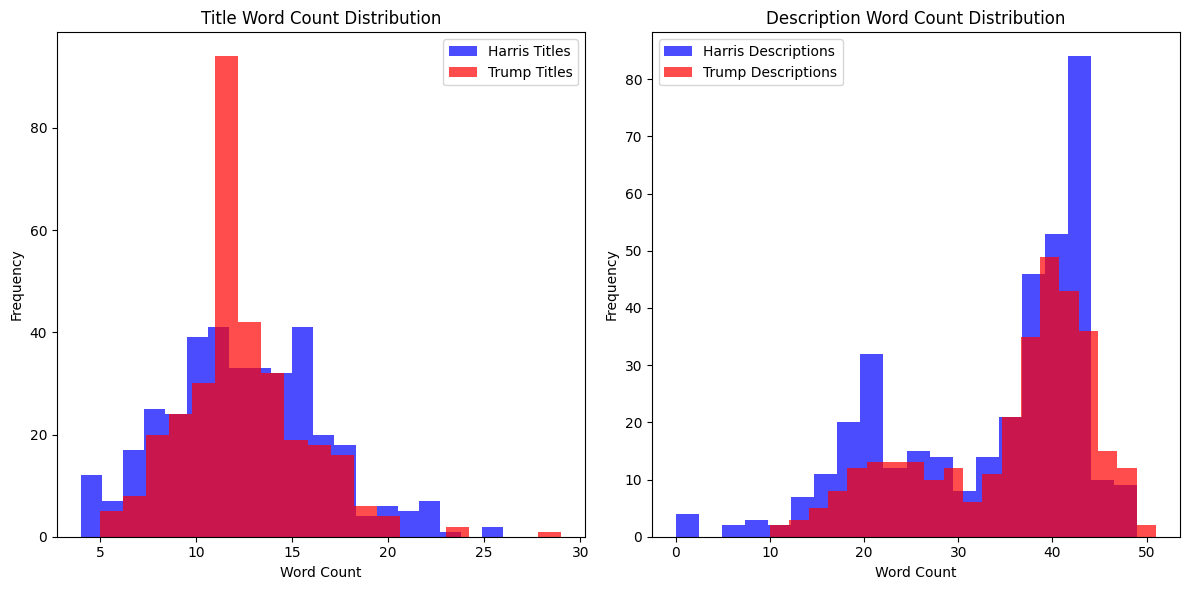

In [12]:
def calculate_word_count(text):
    if pd.notnull(text):
        return len(text.split())
    return 0


# Apply word count function to title and description columns
df_harris_train["title_word_count"] = df_harris_train["title"].apply(calculate_word_count)
df_harris_train["description_word_count"] = df_harris_train["description"].apply(calculate_word_count)

df_trump_train["title_word_count"] = df_trump_train["title"].apply(calculate_word_count)
df_trump_train["description_word_count"] = df_trump_train["description"].apply(calculate_word_count)

plt.figure(figsize=(12, 6))

# Title Word Count
plt.subplot(1, 2, 1)
plt.hist(df_harris_train["title_word_count"], bins=20, alpha=0.7, label="Harris Titles", color="blue")
plt.hist(df_trump_train["title_word_count"], bins=20, alpha=0.7, label="Trump Titles", color="red")
plt.title("Title Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()

# Description Word Count
plt.subplot(1, 2, 2)
plt.hist(
    df_harris_train["description_word_count"],
    bins=20,
    alpha=0.7,
    label="Harris Descriptions",
    color="blue"
)
plt.hist(
    df_trump_train["description_word_count"],
    bins=20,
    alpha=0.7,
    label="Trump Descriptions",
    color="red"
)
plt.title("Description Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### Top News Sources

We analyze the most frequent news sources in both the **Trump** and **Harris** datasets. Understanding which media outlets are publishing the most articles about each candidate gives us insights into potential biases or trends in media coverage.

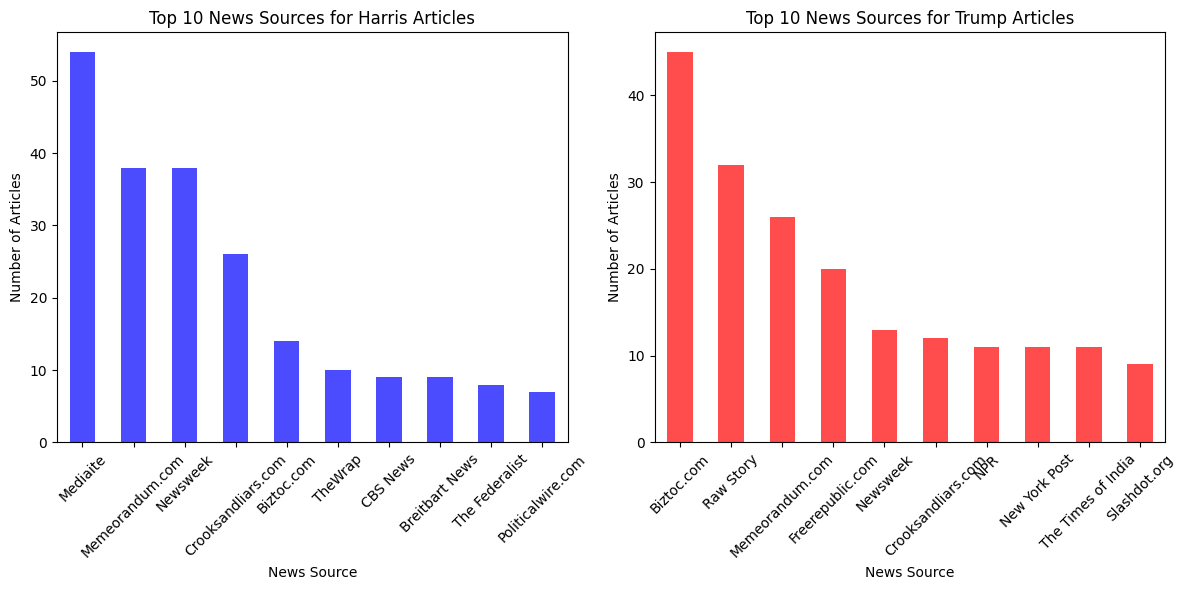

In [13]:
harris_sources = (
    df_harris_train["source"]
    .apply(lambda x: x["name"] if pd.notnull(x) and isinstance(x, dict) else "Unknown")
    .value_counts()
)
trump_sources = (
    df_trump_train["source"]
    .apply(lambda x: x["name"] if pd.notnull(x) and isinstance(x, dict) else "Unknown")
    .value_counts()
)

plt.figure(figsize=(12, 6))

# Harris articles - Top Sources
plt.subplot(1, 2, 1)
harris_sources.head(10).plot(kind="bar", color="blue", alpha=0.7)
plt.title("Top 10 News Sources for Harris Articles")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)

# Trump articles - Top Sources
plt.subplot(1, 2, 2)
trump_sources.head(10).plot(kind="bar", color="red", alpha=0.7)
plt.title("Top 10 News Sources for Trump Articles")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()